In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import random

import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
from scipy.stats import skew
import seaborn as sns
from sklearn import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier

In [41]:
df=pd.concat([
    pd.read_csv('../input/cricket-match-sentiment-scores/IPL_Sentiment.csv'),
    pd.read_csv('../input/cricket-match-sentiment-scores/WC_Sentiment.csv'),
],ignore_index=True)

df

,Unnamed: 0,Match_No,Team1,Team2,Home_Pos,Home_Neg,Away_Pos,Away_Neg,result
0,0,1,CSK,KKR,0.319088,0.054843,0.332582,0.045096,1
1,1,2,DC,MI,0.426230,0.057377,0.425141,0.074859,0
2,2,3,PBKS,RCB,0.440000,0.060000,0.402778,0.097222,0
3,3,4,GT,LSG,0.386364,0.102273,0.421053,0.052632,0
4,4,5,SRH,RR,0.381818,0.072727,0.461847,0.188755,1
...,...,...,...,...,...,...,...,...,...
114,40,41,Bangladesh,Pakistan,0.352941,0.188235,0.373900,0.134897,1
115,41,42,India,Zimbabwe,0.417409,0.102868,0.387097,0.145161,0
116,42,43,New Zealand,Pakistan,0.936833,0.056050,0.429526,0.109051,1
117,43,44,India,England,0.443762,0.067609,0.459198,0.087137,1


In [42]:
result=df.iloc[[2,6,8,10,12,14,22,33,39,40,45,48,49,55,56,63,69,71,72,74,75,78,80,85,88,90,93,108,113,117]]
result

,Unnamed: 0,Match_No,Team1,Team2,Home_Pos,Home_Neg,Away_Pos,Away_Neg,result
2,2,3,PBKS,RCB,0.440000,0.060000,0.402778,0.097222,0
6,6,7,LSG,CSK,0.187500,0.052083,0.380597,0.104478,0
8,8,9,MI,RR,0.468531,0.097902,0.432653,0.146939,1
10,10,11,CSK,PBKS,0.358025,0.141975,0.160428,0.032086,1
12,12,13,RR,RCB,0.456221,0.142857,0.327103,0.074766,1
14,14,15,LSG,DC,0.547619,0.095238,0.262626,0.090909,0
22,22,23,MI,PBKS,0.390766,0.127252,0.477612,0.089552,1
33,33,34,DC,RR,0.275862,0.060345,0.435685,0.178423,1
39,39,40,GT,SRH,0.363636,0.063636,0.460674,0.067416,0
40,40,41,DC,KKR,0.318919,0.113514,0.277778,0.185185,0


In [43]:
df.drop(df.columns[[0,1,2,3]], axis=1, inplace=True)

In [44]:
from sklearn.model_selection import train_test_split

X = df.drop('result', axis=1)
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=125
)

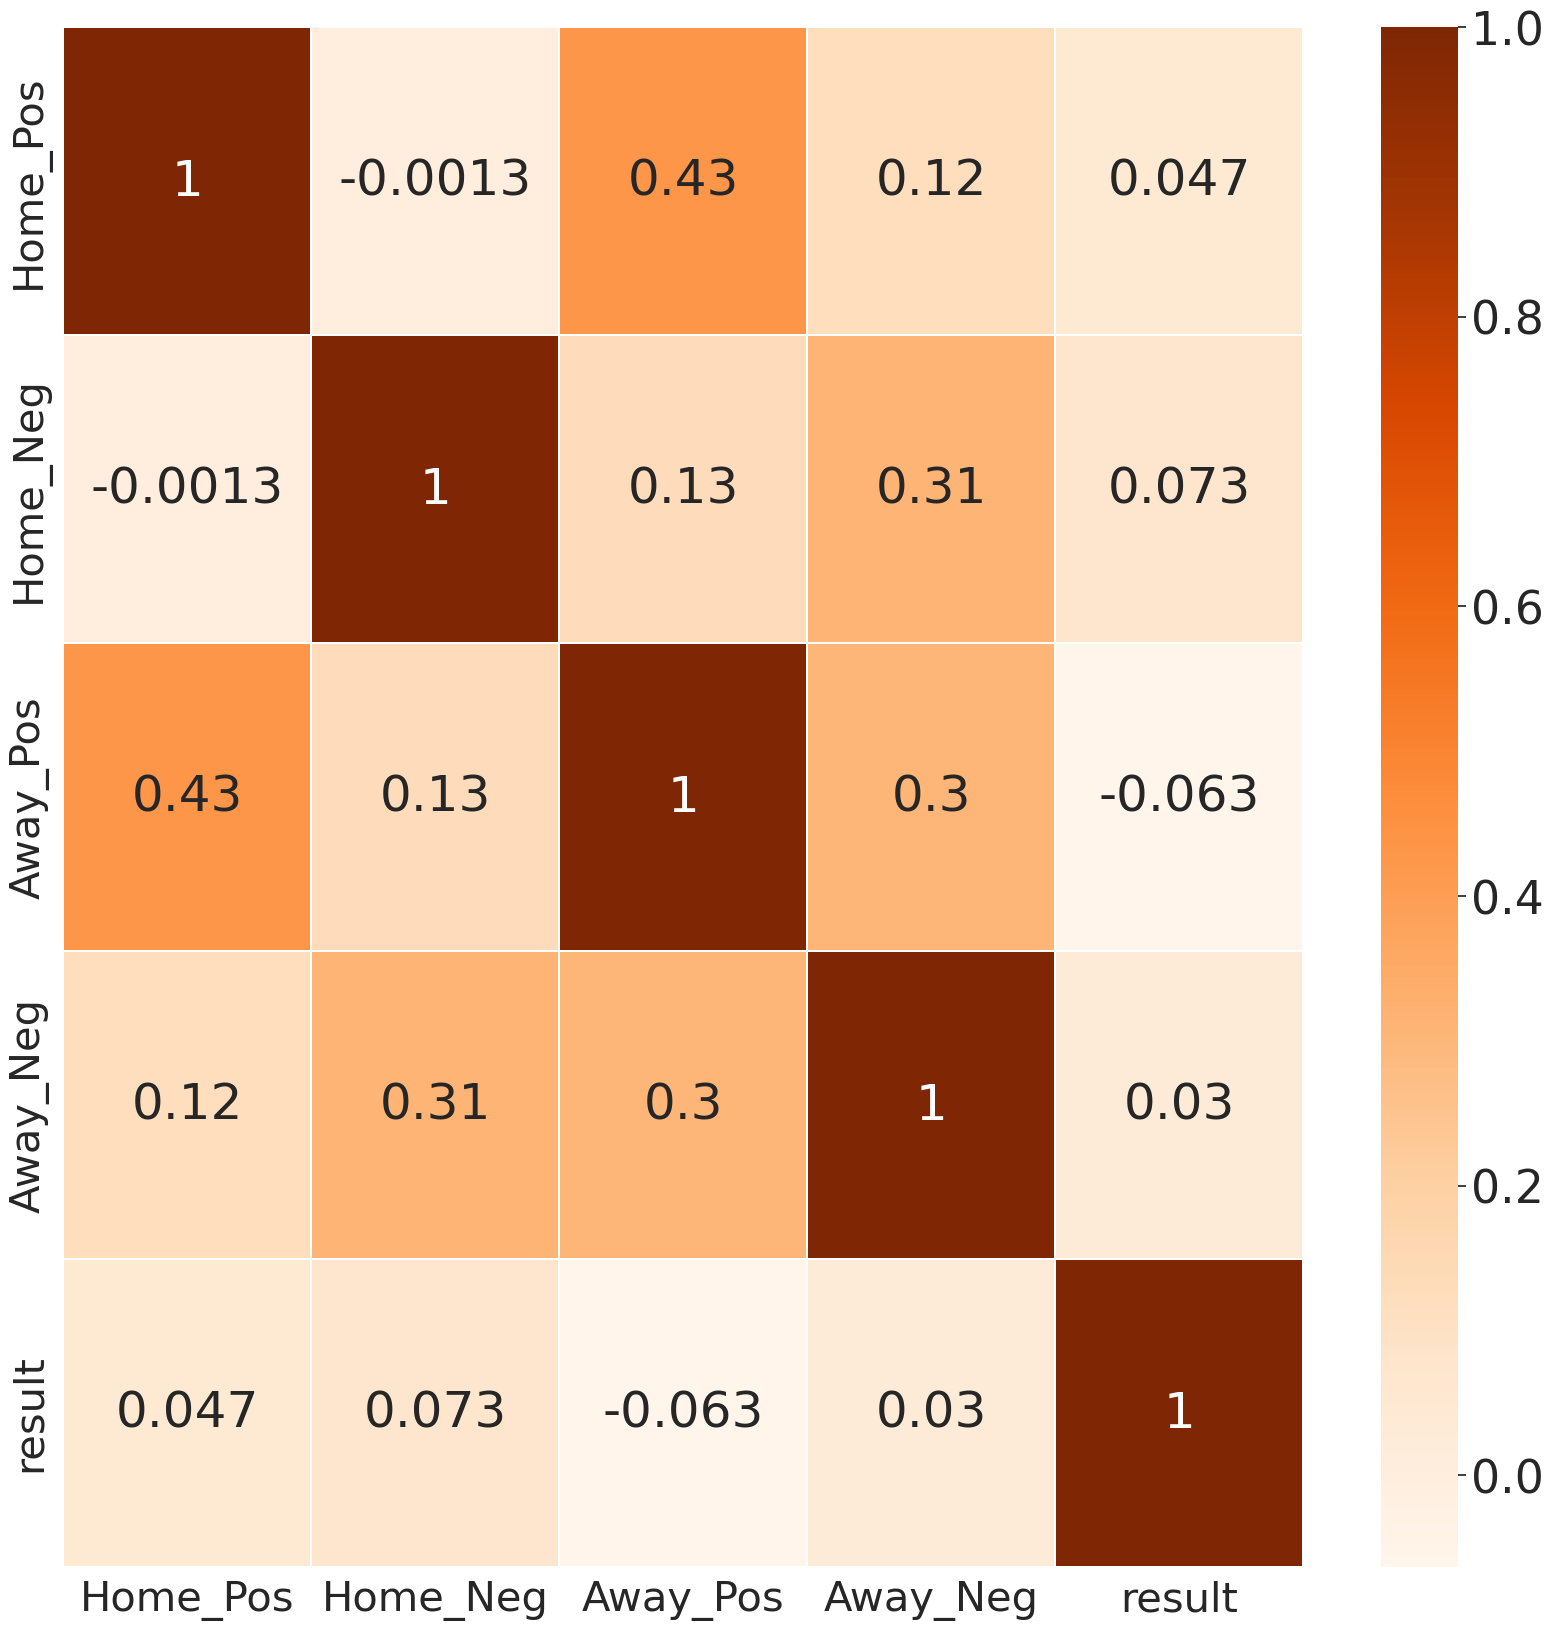

In [45]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
sns.set(font_scale=3) 
sns_pp=sns.heatmap(correlation_matrix, annot= True, linewidth=0.1, cmap= 'Oranges')
scatter_fig = sns_pp.get_figure()
scatter_fig.savefig('image6.png')

In [46]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
NB_predictions = NB_classifier.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(y_test,NB_predictions))
print('Classification report')
print(classification_report(y_test,NB_predictions))
print('Accuracy= ', accuracy_score(y_test, NB_predictions))

Confusion matrix
[[4 9]
 [8 9]]
Classification report
              precision    recall  f1-score   support

           0       0.33      0.31      0.32        13
           1       0.50      0.53      0.51        17

    accuracy                           0.43        30
   macro avg       0.42      0.42      0.42        30
weighted avg       0.43      0.43      0.43        30

Accuracy=  0.43333333333333335


In [47]:
RF_classifier = RandomForestClassifier(n_estimators=100)

RF_classifier.fit(X_train, y_train)

RF_predictions = RF_classifier.predict(X_test)

print('Confusion matrix')
print(confusion_matrix(y_test,RF_predictions))
print('Classification report')
print(classification_report(y_test,RF_predictions))
print('Accuracy= ', accuracy_score(y_test, RF_predictions))

Confusion matrix
[[8 5]
 [9 8]]
Classification report
              precision    recall  f1-score   support

           0       0.47      0.62      0.53        13
           1       0.62      0.47      0.53        17

    accuracy                           0.53        30
   macro avg       0.54      0.54      0.53        30
weighted avg       0.55      0.53      0.53        30

Accuracy=  0.5333333333333333


In [48]:
XGB_classifier = XGBClassifier()

XGB_classifier.fit(X_train, y_train)

XGB_predictions = XGB_classifier.predict(X_test)

print('Confusion matrix')
print(confusion_matrix(y_test,XGB_predictions))
print('Classification report')
print(classification_report(y_test,XGB_predictions))
print('Accuracy= ', accuracy_score(y_test, XGB_predictions))

Confusion matrix
[[ 7  6]
 [10  7]]
Classification report
              precision    recall  f1-score   support

           0       0.41      0.54      0.47        13
           1       0.54      0.41      0.47        17

    accuracy                           0.47        30
   macro avg       0.48      0.48      0.47        30
weighted avg       0.48      0.47      0.47        30

Accuracy=  0.4666666666666667


In [49]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_classifier.fit(X_train, y_train)
KNN_predictions = KNN_classifier.predict(X_test)

print('Confusion matrix')
print(confusion_matrix(y_test,KNN_predictions))
print('Classification report')
print(classification_report(y_test,KNN_predictions))
print('Accuracy= ', accuracy_score(y_test, KNN_predictions))
print(X_test, y_test, KNN_predictions)

Confusion matrix
[[8 5]
 [8 9]]
Classification report
              precision    recall  f1-score   support

           0       0.50      0.62      0.55        13
           1       0.64      0.53      0.58        17

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.58      0.57      0.57        30

Accuracy=  0.5666666666666667
     Home_Pos  Home_Neg  Away_Pos  Away_Neg
113  0.418182  0.272727  0.458015  0.129771
69   0.441860  0.162791  0.400000  0.100000
78   0.578288  0.100209  0.658228  0.088608
93   0.586207  0.082759  0.599119  0.110132
33   0.275862  0.060345  0.435685  0.178423
80   0.454545  0.113636  0.507692  0.092308
49   0.533981  0.077670  0.444444  0.069444
88   0.563291  0.107595  0.494505  0.131868
108  0.387554  0.138632  0.375661  0.164021
71   0.396825  0.063492  0.387387  0.049550
72   0.369128  0.089485  0.231063  0.051932
56   0.411765  0.058824  0.366337  0.099010
55   0.443959  0.

In [50]:
from sklearn.svm import SVC
C = 1.0
SVM_classifier = SVC(kernel = 'linear', random_state = 0,C=1)
SVM_classifier.fit(X_train, y_train)
SVM_predictions = SVM_classifier.predict(X_test)

print('Confusion matrix')
print(confusion_matrix(y_test,SVM_predictions))
print('Classification report')
print(classification_report(y_test,SVM_predictions))
print('Accuracy= ', accuracy_score(y_test, SVM_predictions))

Confusion matrix
[[13  0]
 [16  1]]
Classification report
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        13
           1       1.00      0.06      0.11        17

    accuracy                           0.47        30
   macro avg       0.72      0.53      0.37        30
weighted avg       0.76      0.47      0.33        30

Accuracy=  0.4666666666666667


In [51]:
from sklearn.svm import SVC
C = 1.0
SVM2_classifier = SVC(kernel = 'rbf', random_state = 0,C=1)
SVM2_classifier.fit(X_train, y_train)
SVM2_predictions = SVM2_classifier.predict(X_test)

print('Confusion matrix')
print(confusion_matrix(y_test,SVM2_predictions))
print('Classification report')
print(classification_report(y_test,SVM2_predictions))
print('Accuracy= ', accuracy_score(y_test, SVM2_predictions))

Confusion matrix
[[5 8]
 [9 8]]
Classification report
              precision    recall  f1-score   support

           0       0.36      0.38      0.37        13
           1       0.50      0.47      0.48        17

    accuracy                           0.43        30
   macro avg       0.43      0.43      0.43        30
weighted avg       0.44      0.43      0.44        30

Accuracy=  0.43333333333333335


In [52]:
SVM3_classifier = SVC(kernel = 'poly', random_state = 0,degree=3)
SVM3_classifier.fit(X_train, y_train)
SVM3_predictions = SVM3_classifier.predict(X_test)

print('Confusion matrix')
print(confusion_matrix(y_test,SVM3_predictions))
print('Classification report')
print(classification_report(y_test,SVM3_predictions))
print('Accuracy= ', accuracy_score(y_test, SVM3_predictions))

Confusion matrix
[[ 4  9]
 [ 6 11]]
Classification report
              precision    recall  f1-score   support

           0       0.40      0.31      0.35        13
           1       0.55      0.65      0.59        17

    accuracy                           0.50        30
   macro avg       0.48      0.48      0.47        30
weighted avg       0.49      0.50      0.49        30

Accuracy=  0.5


In [53]:
C=1
SVM4_classifier = SVC(kernel = 'sigmoid', random_state = 0,C=1)
SVM4_classifier.fit(X_train, y_train)
SVM4_predictions = SVM4_classifier.predict(X_test)

print('Confusion matrix')
print(confusion_matrix(y_test,SVM4_predictions))
print('Classification report')
print(classification_report(y_test,SVM4_predictions))
print('Accuracy= ', accuracy_score(y_test, SVM4_predictions))

Confusion matrix
[[13  0]
 [17  0]]
Classification report
              precision    recall  f1-score   support

           0       0.43      1.00      0.60        13
           1       0.00      0.00      0.00        17

    accuracy                           0.43        30
   macro avg       0.22      0.50      0.30        30
weighted avg       0.19      0.43      0.26        30

Accuracy=  0.43333333333333335


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
